In [1]:
import cv2 as cv
import numpy as np
import import_ipynb
from Color_Returner import pipeline
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math

importing Jupyter notebook from Color_Returner.ipynb
importing Jupyter notebook from cluster_images_kmeans.ipynb
importing Jupyter notebook from crop_clustering.ipynb


In [2]:
# rgb values of the interop colours
white=np.array([255,255,255])
black=np.array([0,0,0])
gray=np.array([128,128,128])
red=np.array([255,0,0])
blue=np.array([0,0,255])
green=np.array([0,255,0])
yellow=np.array([255,255,0])
purple=np.array([128,0,128])
brown=np.array([165,42,42])
orange=np.array([255,165,0])
colours={'white':white,'black':black,'gray':gray,'red':red,'blue':blue,'green':green,'yellow':yellow,'purple':purple,'brown':brown,'orange':orange}

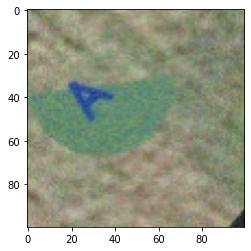

(3, 3)


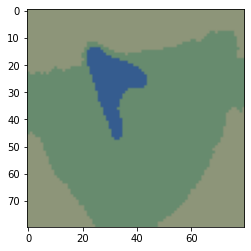

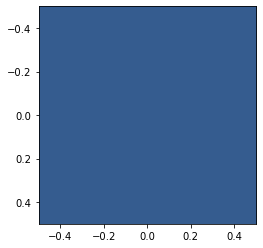

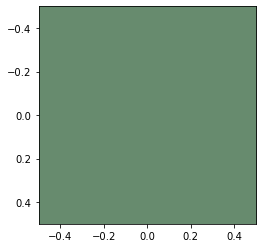

Letter:  blue
Shape:  green


In [6]:

image=cv.imread('C:/Users/neeti/Projects/Manas/AUVSI/generated_data/letters/A/semicircle_A_26.jpg')
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
plt.show()
value,shape,segmented=pipeline(image)
plt.imshow(segmented)
plt.show()
plt.imshow([[value]])
plt.show()
plt.imshow([[shape]])
plt.show()
# conversion to hls colour space
value_hls=cv.cvtColor(np.array([[value]],dtype='float32'),cv.COLOR_RGB2HLS)
shape_hls=cv.cvtColor(np.array([[shape]],dtype='float32'),cv.COLOR_RGB2HLS)

differences_letter=[]
differences_shape=[]
for color in colours:
    
    standard_value=np.array(colours[color])
    standard_value_hls=cv.cvtColor(np.array([[standard_value]],dtype='float32'),cv.COLOR_RGB2HLS)
    # euclidean distance between the two colours as the difference measure
    differences_letter.append(norm(value_hls-standard_value_hls))
    differences_shape.append(norm(shape_hls-standard_value_hls))

print('Letter: ',list(colours.keys())[np.argmin(differences_letter)])
print('Shape: ',list(colours.keys())[np.argmin(differences_shape)])